# Vamos a comenzar mostrando datos acerca del archivo `DatosDeUso_12_2020`
### Este archivo contiene datos relacionados con los datos de uso de diciembre de 2020

#### Comenzamos trabajando con DataFrames
En primer lugar vamos a iniciar la sesión en spark y el nombre del fichero, para a continuación visualizar las columnas con las que vamos a trabajar, y posteriormente la definiremos

In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

filename = "DatosDeUso_12_2020.json"

df = spark.read.json(filename)
print("Vamos a mostrar las columnas acerca de los datos\n",df.columns)
print("\nMostraremos a continuación un ejemplo de los datos que usamos\n", df.take(1))

Vamos a mostrar las columnas acerca de los datos
 ['_id', 'ageRange', 'idplug_base', 'idplug_station', 'idunplug_base', 'idunplug_station', 'travel_time', 'unplug_hourTime', 'user_day_code', 'user_type', 'zip_code']

Mostraremos a continuación un ejemplo de los datos que usamos
 [Row(_id=Row($oid='5fcc10fc1b91315b982817bd'), ageRange=4, idplug_base=16, idplug_station=182, idunplug_base=8, idunplug_station=71, travel_time=337, unplug_hourTime='2020-12-01T00:00:00Z', user_day_code='1b9453cb0a60d9826d01a247deb208cff8f47a4cc74903b09a09571877e10738', user_type=1, zip_code='28012')]


### Tenemos los siguientes elementos 

- id: identificador del movimiento.

- ageRange: número que indica el rango de edad del usuario que ha realizado el movimiento. Sus posibles valores son:
    * 0: No se ha podido determinar el rango de edad del usuario
    * 1: El usuario tiene entre 0 y 16 años
    * 2: El usuario tiene entre 17 y 18 años
    * 3: El usuario tiene entre 19 y 26 años
    * 4: El usuario tiene entre 27 y 40 años
    * 5: El usuario tiene entre 41 y 65 años
    * 6: El usuario tiene 66 años o más

- idplug_base: Número de la base en la que se engancha la bicicleta.

- idunplug_base: Número de la base de la que se desengancha la bicicleta.

- idplug_station: Número de la estación en la que se engancha la bicicleta.

- idunplug_station: Número de la estación de la que se desengancha la bicicleta.

- travel_time: Tiempo total en segundos, entre el desenganche y el enganche de la
bicicleta.

- unplug_hourTime: Franja horaria en la que se realiza el desenganche de la bicicleta.
Por cuestiones de anonimato, se facilita la hora de inicio del movimiento, sin la
información de minutos y segundos. Todos los movimientos iniciados durante la
misma hora, tendrán el mismo dato de inicio.

- user_day_code: Código del usuario. Para una misma fecha, todos los movimientos de
un mismo usuario, tendrán el mismo código, con el fin de poder realizar estudios
estadísticos de las tendencias diarias de los usuarios.

- user_type: Número que indica el tipo de usuario que ha realizado el movimiento. Sus
posibles valores son:
* 0: No se ha podido determinar el tipo de usuario
* 1: Usuario anual (poseedor de un pase anual)
* 2: Usuario ocasional
* 3: Trabajador de la empresa

- zip_code: Texto que indica el código postal del usuario que ha realizado el movimiento.


In [2]:
# En el caso que no queramos utilizar alguna columna para el tratamiento de los datos,
# simplemente con .drop(nombre_columna) eliminamos esos datos

df_sin_zip_code = df.drop('zip_code')
df_sin_zip_code.columns


['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type']

In [13]:
lista

[Row(ageRange=0, count=144033),
 Row(ageRange=6, count=1310),
 Row(ageRange=5, count=49799),
 Row(ageRange=1, count=2221),
 Row(ageRange=3, count=10573),
 Row(ageRange=2, count=1046),
 Row(ageRange=4, count=56279)]

Vamos a motrar datos acerca de los usos de BiciMad en función de las edades:
+--------+------+
|ageRange| count|
+--------+------+
|       0|144033|
|       6|  1310|
|       5| 49799|
|       1|  2221|
|       3| 10573|
|       2|  1046|
|       4| 56279|
+--------+------+



C:\Users\azize\AppData\Local\Temp\ipykernel_14952\1102229475.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


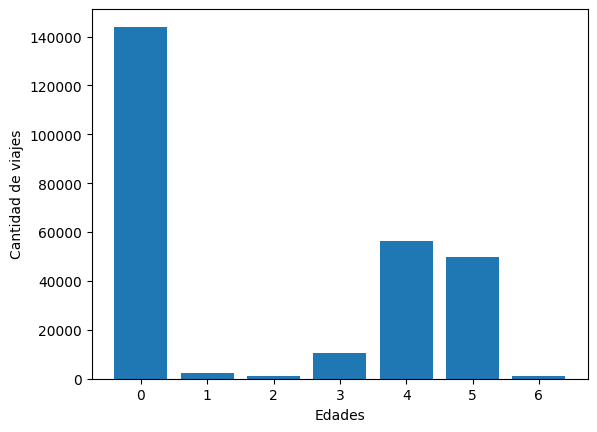

In [15]:
# De manera análoga también podría ser útil trabajar con una sola columna para ello usamos groupBy(nombre_columna)
df_edad = df.groupBy('ageRange').count()
print("Vamos a motrar datos acerca de los usos de BiciMad en función de las edades:")
df_edad.show()

#Vamos a realizar un histograma para visualizar los datos de manera gráfica
lista = df_edad.collect()
edad = [i[0] for i in lista]
datos = [i[1] for i in lista]


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(edad,datos)
ax.set_xlabel("Edades")
ax.set_ylabel("Cantidad de viajes")
fig.show()

**Ahora vamos a realizar vamos a mostrar una opción de preprocesado de datos**

Supongamos que queremos eliminar la edad de tipo '0' debido a que no nos ofrece información de la edad, utilizaremos filter.
Hagamos esto para el caso anterior.

C:\Users\azize\AppData\Local\Temp\ipykernel_14952\800976701.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


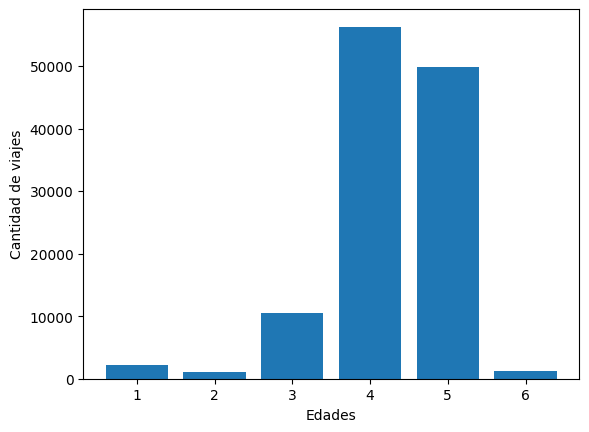

In [16]:
df_filter0 = df.filter(df['ageRange'] != 0 )
df_filter0 = df_filter0.groupBy('ageRange').count()
#df_filter0.show()
edad = df_filter0.select("ageRange")
datos = df_filter0.select("count")


lista = df_filter0.collect()
edad = [i[0] for i in lista]
datos = [i[1] for i in lista]


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(list(edad),list(datos))
ax.set_xlabel("Edades")
ax.set_ylabel("Cantidad de viajes")
fig.show()

## Voy a mostrar un ejemplo con estos datos que haremos después 

# Problema 1: cliente objetivo [soltar_texto_medioambiental]

Nuestra idea para trabajar en este problema es contabilizar datos acerca de los clientes en función de:

1. Edad (*ageRange*).
2. Tiempo de viaje (*travel_time*).
3. zona de uso.


Comenzaremos realizando un filtrado de datos

* En relación a la edad nos interesa eliminar el 0 que no ofrece datos sobre la edad.

* En relación al tiempo de uso deberemos de eliminar los viajes de menos de 60 segundos, pues estos podrían estar relacionados con errore como
que no funcione la bici, o que hayas cambiado de opinión sobre usar la bici.

* En relación al código postal, debemos de eliminar aquellos clientes que no lo han añadido.

* Podemos eliminar también los trabajadores de la empresa biciMad ya que esta dirigido a los clientes.



In [20]:


df_filtrado = df.filter(df['ageRange'] != 0 )
df_filtrado = df_filtrado.filter(df_filtrado['travel_time'] > 60 )
df_filtrado = df_filtrado.filter(df_filtrado['zip_code'] != '' )
df_filtrado = df_filtrado.filter(df_filtrado['user_type'] != 3 )

# df_filtrado.groupBy(['ageRange']).count().show()  # TODO: duplicado?

#Podemos realizar clusters sobre el tiempo o calcular la media simplemente
from pyspark.sql.functions import mean

travel_time = df_filtrado.select(['travel_time'])
# travel_time.show()  # TODO: necesario?
mean_time = df_filtrado.select(mean('travel_time')).collect()[0][0]
print(f"El tiempo medio de viaje es: {int(mean_time // 60)} minutos y {int(mean_time % 60)} segundos")

df_filtrado.groupBy(['zip_code']).count().show()




El tiempo medio de viaje es: 15 minutos y 31 segundos
+---------+-----+
| zip_code|count|
+---------+-----+
|    28039| 1415|
|    28500|   53|
|    28600|   19|
|    28053|  429|
|    08030|    9|
|    28034|  206|
|    28341|   11|
|    15006|   19|
|    39005|    8|
|    42285|   14|
|    28019|  973|
|    28400|   87|
|    28220|   85|
|    28840|   20|
|    07002|    8|
|ureaofs20|    2|
|    11500|    2|
|    28020| 2565|
|    50011|   27|
|    03440|   17|
+---------+-----+
only showing top 20 rows



In [21]:
#Paramos la anterior sesion
spark.stop()

# Ahora vamos a trabajar con los archivos de otra forma distinta al DataFrame, con rdd (Aparentemente es más sencillo)
#### Pudiendo elegir de cara al siguiente fichero donde estamos más cómodos o saber ventajas y desventajas

In [22]:
from pyspark import SparkContext
sc = SparkContext()

In [117]:
!head -10 "DatosDeUso_12_2020.json"

{"_id": {"$oid": "5fcc10fc1b91315b982817bd"}, "user_day_code": "1b9453cb0a60d9826d01a247deb208cff8f47a4cc74903b09a09571877e10738", "idplug_base": 16, "user_type": 1, "idunplug_base": 8, "travel_time": 337, "idunplug_station": 71, "ageRange": 4, "idplug_station": 182, "unplug_hourTime": "2020-12-01T00:00:00Z", "zip_code": "28012"}
{"_id": {"$oid": "5fcc10fc1b91315b982817be"}, "user_day_code": "29fe8cf0fb57fdfc4c1ef5a51fbd1222afea11d33a6e090a0b642ee1b92b2aa8", "idplug_base": 19, "user_type": 1, "idunplug_base": 1, "travel_time": 190, "idunplug_station": 35, "ageRange": 0, "idplug_station": 18, "unplug_hourTime": "2020-12-01T00:00:00Z", "zip_code": ""}
{"_id": {"$oid": "5fcc10fc1b91315b982817c0"}, "user_day_code": "051f14e387dd8f5442f9c4cd6e3db915c48ff64bbb8c531df085b392d902ee25", "idplug_base": 14, "user_type": 1, "idunplug_base": 21, "travel_time": 354, "idunplug_station": 46, "ageRange": 4, "idplug_station": 175, "unplug_hourTime": "2020-12-01T00:00:00Z", "zip_code": "28012"}
{"_id": {

In [24]:
import json

rdd_base = sc.textFile('DatosDeUso_12_2020.json')
# rdd_base.take(2) # TODO: funciona esto?

# Si queremos una columna en especial

def columna(line):
    data = json.loads(line)
    u_t = data['user_type']
    return u_t

tipo_usuarios = rdd_base.map(columna)

tipo_usuarios.take(10)

#Si quiero la cantidad de usuarios estableciendo un sistema de valores donde su valor está en función de su tipo de usuario

tipo_usuarios.count()

265261

In [25]:
def mapper(line):
    data = json.loads(line)
    u_t = data['user_type']
    u_c = data['user_day_code']
    start = data['idunplug_station']
    end = data['idplug_station']
    time = data['travel_time']
    return u_t, u_c, start, end, time

rdd = rdd_base.map(mapper)
rdd.take(2)



[(1,
  '1b9453cb0a60d9826d01a247deb208cff8f47a4cc74903b09a09571877e10738',
  71,
  182,
  337),
 (1,
  '29fe8cf0fb57fdfc4c1ef5a51fbd1222afea11d33a6e090a0b642ee1b92b2aa8',
  35,
  18,
  190)]

 ## Analogo a lo de las edades 

Mostrados los datos en relación a las edades defaultdict(<class 'int'>, {4: 56279, 0: 144033, 5: 49799, 3: 10573, 1: 2221, 6: 1310, 2: 1046})


/tmp/ipykernel_5448/3684889876.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



 Vamos a realizar el mismo proceso pero filtrando datos



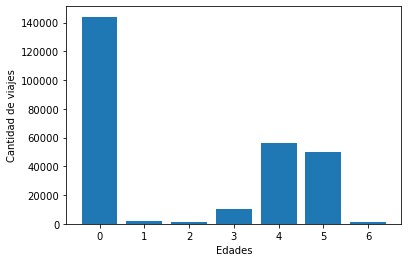

In [143]:
#Partimos los datos 

def map_age(line):
    data = json.loads(line)
    a_r = data['ageRange']
    return a_r

edades = rdd_base.map(map_age).countByValue()
print("Mostrados los datos en relación a las edades",edades)

#Realizaremos un histograma como antes
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(list(edades.keys()),list(edades.values()))
ax.set_xlabel("Edades")
ax.set_ylabel("Cantidad de viajes")
fig.show()

print("\n Vamos a realizar el mismo proceso pero filtrando datos\n")
#Quitaremos edades tipo 0 ; es mucho más sencillo

In [147]:
rdd.take(2)

[(1,
  '1b9453cb0a60d9826d01a247deb208cff8f47a4cc74903b09a09571877e10738',
  71,
  182,
  337),
 (1,
  '29fe8cf0fb57fdfc4c1ef5a51fbd1222afea11d33a6e090a0b642ee1b92b2aa8',
  35,
  18,
  190)]

### Vamos a filtrar sobre datos del tipo `rdd` 
Por lo tanto eliminamos esa variable, y luego aislamos el id del resto de datos

In [150]:
select_type = 1
rdd_users = rdd.filter(lambda x: x[0] == select_type).map(lambda x: (x[1],tuple(x[2:])))

rdd_users.take(2)

print("La cantidad de usuarios tipo 1 es:" ,rdd_users.count())

La cantidad de usuarios tipo 1 es: 255154


### Vamos a trabajar con la información de origen y destino (de manera análoga trabajaremos en relación al medioambiente)

In [154]:
"""Datos a filtrar:
(1,
  '29fe8cf0fb57fdfc4c1ef5a51fbd1222afea11d33a6e090a0b642ee1b92b2aa8',
  35, [queremos esto]
  18, [queremos esto]
  190)"""
rdd_trips = rdd_users.map(lambda x: (x[1][0],x[1][1]))
rdd_trips.take(2)

print("La cantidad de viajes es:", rdd_trips.count())

La cantidad de viajes es: 255154
